In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv(r'C:\Users\AMUS\python\mediapipe\mediapipe_algorithm.csv')

# Convert categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
df['Person ID'] = label_encoder.fit_transform(df['Person ID'])
df['Test ID'] = label_encoder.fit_transform(df['Test ID'])
df['Seat ID'] = label_encoder.fit_transform(df['Seat ID'])

# Drop irrelevant columns
columns_to_drop = ['Image', 'Time', 'Date', 'Keypoint', 'Minutes_Seconds', 'Main Timestamp']
df = df.drop(columns=columns_to_drop, axis=1)
df['sensation'].fillna(df['sensation'].median(), inplace=True)
# Define Features (X) and Target (y)
# Assuming the columns you need are head, hand, shin, and whole body temperature, 
# you need to include those in X (adjust column names as per your dataframe).
X = df[['HeadAll_Temperature', 'HandAll_Temperature', 'ShinAll_Temperature']] 
y = df['sensation']  # Target column for sensation

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae')
model.fit(X_train, y_train)

# Make Predictions and Evaluate
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.09320516872151374


In [3]:
# Calculate R-squared (coefficient of determination)
r2_score = model.score(X_test, y_test)
print(f"R-squared: {r2_score}")


R-squared: 0.8346525503233715


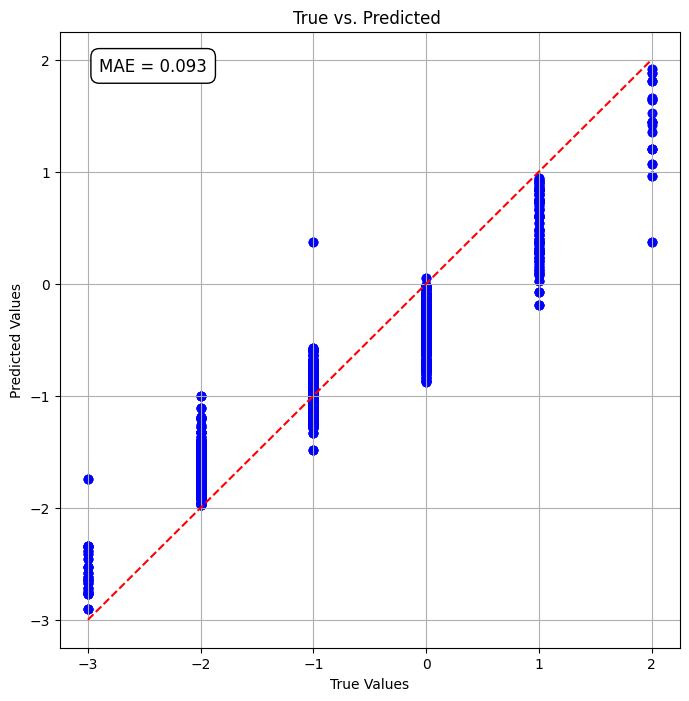

In [6]:
import matplotlib.pyplot as plt

# Scatter plot of True vs. Predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.text(x=min(y_test) + 0.1, y=max(y_test) - 0.1,  # Adjust position for readability
         s=f'MAE = {mae:.3f}', fontsize=12, color='black',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted ')
plt.grid(True)
plt.show()


In [16]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv(r'C:\Users\AMUS\python\mediapipe\mediapipe_algorithm.csv')

# Convert categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
df['Person ID'] = label_encoder.fit_transform(df['Person ID'])
df['Test ID'] = label_encoder.fit_transform(df['Test ID'])
df['Seat ID'] = label_encoder.fit_transform(df['Seat ID'])

# Drop irrelevant columns
columns_to_drop = ['Image', 'Time', 'Date', 'Keypoint', 'Minutes_Seconds', 'Main Timestamp']
df = df.drop(columns=columns_to_drop, axis=1)

# Remove rows with missing values in any of the columns (including target 'sensation' and features)
df = df.dropna(subset=['sensation'])

# Define Features (X) and Target (y)
X = df[['HeadAll_Temperature', 'HandAll_Temperature', 'ShinAll_Temperature', 'whole_Body']] 
y = df['sensation']  # Target column for sensation

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae')
model.fit(X_train, y_train)

# Make Predictions and Evaluate
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.04061729026857747


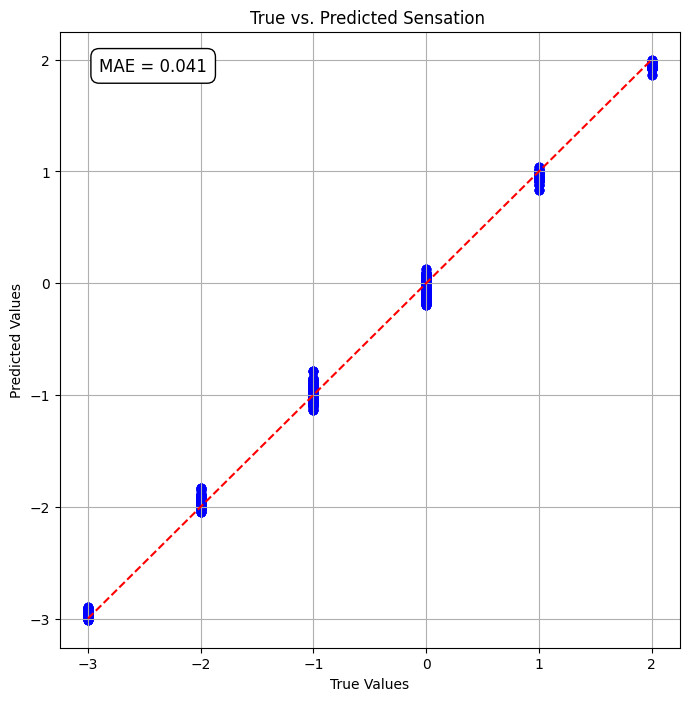

In [19]:
import matplotlib.pyplot as plt

# Scatter plot of True vs. Predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.text(x=min(y_test) + 0.1, y=max(y_test) - 0.1,  # Adjust position for readability
         s=f'MAE = {mae:.3f}', fontsize=12, color='black',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Sensation ')
plt.grid(True)
plt.show()

In [18]:
r2_score = model.score(X_test, y_test)
print(f"R-squared: {r2_score}")

R-squared: 0.9967832034887057


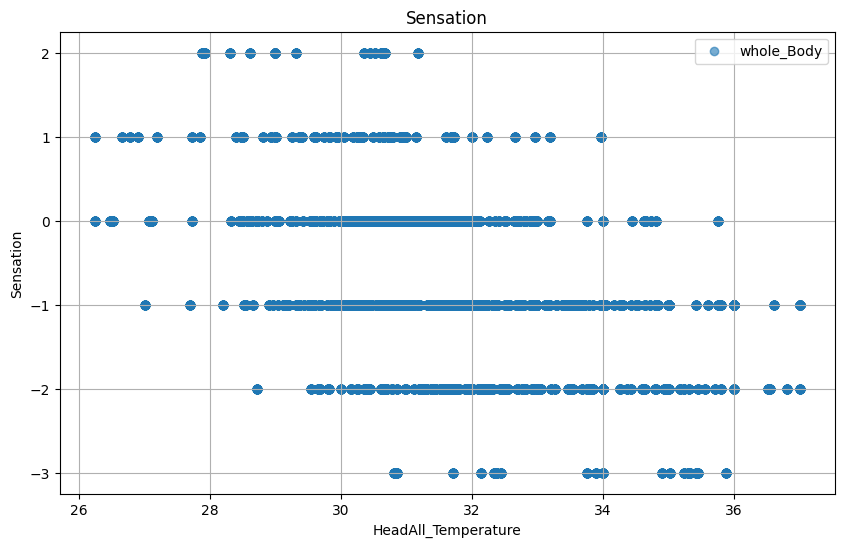

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for sensation vs temperature (x-axis)
plt.figure(figsize=(10, 6))

# Assuming you want to plot a specific temperature (e.g., HeadAll_Temperature)
plt.scatter(df['HeadAll_Temperature'], df['sensation'], alpha=0.6, label='whole_Body')

# Add labels and title
plt.xlabel('HeadAll_Temperature')
plt.ylabel('Sensation')
plt.title('Sensation')
plt.legend()
plt.grid(True)
plt.show()
